> # Chapter 8. Functions and Tables
---
1. Applying Functions to Columns


2. Classifying by One Variable


3. Cross-Classifying


4. Joining Tables by Columns


5. Bike Sharing in the Bay Area


In [1]:
!pip install --upgrade datascience ## for Map

ERROR: Invalid requirement: '##'


In [2]:
# HIDDEN
from datascience import *
#import matplotlib
#matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
#np.set_printoptions(threshold=50)
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

> ### Defining a Function 
---
+ 외부 함수를 지금까지 사용해 왔다.


+ 우리 코드 중 일부는 매우 반복적으로 사용되기도 한다.
 - 이런 부분을 함수로 만들면 편리하다.

<img src="https://drive.google.com/uc?id=1drm4yt-_n9eQZNyU5NWPo5jkDQ-CnFJQ"  width="700">


In [3]:
# Our first function definition

def double(x):
    """ Double x """
    return 2*x


우리가 정의한 double() function을 호출하여 사용해 보자.

In [4]:
double(17)

34

In [5]:
double(-0.6/4)

-0.3

In [6]:
any_name = 42
double(any_name)

84

In [7]:
double(make_array(3, 4, 5)) # array도 가능하다.

array([ 6,  8, 10], dtype=int64)

> Docstrings
---
+ 복잡한 function을 작성하는 경우 설명문을 작성해 두는 것이 좋다.


+ help, ?를 이용할 수 있게 된다.


+ 귀찮은 작업이지만 다른 사용자를 위해 문서화는 중요하다. 

In [8]:
# A function with more than one argument

def percent(x, total):
    """Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67
    """
    return round((x/total)*100, 2)

In [9]:
help(percent)

Help on function percent in module __main__:

percent(x, total)
    Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67



In [10]:
percent?

Signature: percent(x, total)
Docstring:
Convert x to a percentage of total.

More precisely, this function divides x by total,
multiplies the result by 100, and rounds the result
to two decimal places.

>>> percent(4, 16)
25.0
>>> percent(1, 6)
16.67
File:      c:\users\tlsdn\appdata\local\temp\ipykernel_12208\3137826222.py
Type:      function


In [11]:
percent(33, 200)

16.5

array를 입력받아 percent를 계산해 주는 함수를 작성해 보자.

In [12]:
def percents(counts):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    # total = sum(counts)
    return np.round((counts/total)*100, 2)


In [13]:
some_array = make_array(7, 10, 4)
percents(some_array)

array([33.33, 47.62, 19.05])

> 조금 더 긴 예제를 보자.

In [14]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return np.max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)

The biggest difference is 5


In [15]:
np.diff(some_numbers)

array([ 2,  1,  1, -2, -5,  2], dtype=int64)

> 조금 더 복잡한 예제를 보자.

In [16]:
def percents(counts, decimal_places):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))

Rounded to 1 decimal place:  [28.6 14.3 57.1]
Rounded to 2 decimal places: [28.57 14.29 57.14]
Rounded to 3 decimal places: [28.571 14.286 57.143]


+ 프로그램은 가장 일반적으로 작성하는 게 좋다.


+ decimal place를 지정하지 못하는 상황이라면?
 - default argument를 정해줄 수 있다.

In [17]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


> ### Applying a Function to a Column
---
+ 앞서 function의 argument로서 배열을 사용


+ 그러나 function을 column에 적용하는 방법도 가능

In [18]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [19]:
cut_off_at_100(17)

17

In [20]:
cut_off_at_100(117)

100

앞서 연령별 인구 데이터에서처럼 100세이상을 AGE=100으로 분류하는 데 위 함수를 적용해 보자.

In [21]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


> apply
---
+ Table의 column에 function을 적용하는 Table의 method


+ Table _ages_ 의 column _Age_ 각각 값에 function _cut_off_at_100_ 을 호출해 보자.

In [22]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100], dtype=int64)

In [23]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


> ### Example : Prediction
---

+ 예측은 매우 중요한 data science task 중 하나이다.


+ Francis Galton은 부모의 키와 자녀의 키 사이에 상관관계가 있다고 생각했다.


+ Function을 적절하게 정의하여 부모키로부터 (첫번째) 자녀의 키를 예측해 보자.


In [24]:
# Galton's data on heights of parents and their adult children
galton = Table.read_table(fpath+'galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


+ 필요한 column들만을 선택하고 적절하게 label을 변경하자.

In [25]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


AttributeError: module 'collections' has no attribute 'Iterable'

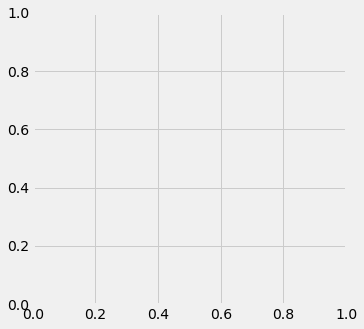

In [26]:
heights.scatter(0)

+ MidParent=68 inch 일 때, Child의 키는 어떻게 예측할 수 있을까?


+ 다음 그래프의 붉은 선과 금색 점의 의미를 추측해 보자.
 - 코드의 의미는 알 필요없다.

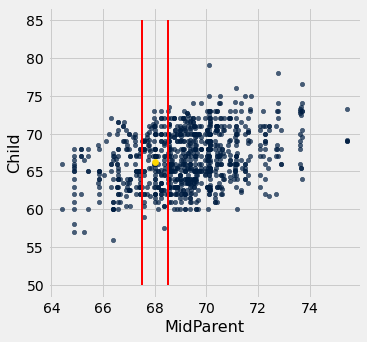

In [ ]:
heights.scatter('MidParent')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=40)

+ 그러한 결과(즉, gold point의 Child height 값)를 얻을 수 있도록 계산식을 작성해 보자.

In [ ]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [ ]:
close_to_68.column('Child').mean()

66.24045801526718

+ 이제 모든 individual에 대해서 child height를 예측해 보자.


+ 먼저, child height 예측값을 계산하는 function이 필요하다.

In [ ]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()     

In [ ]:
predict_child(68)

66.24045801526718

In [ ]:
predict_child(74)

70.41578947368421

+ 예측값과 실제값을 비교해 보자.

In [ ]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)
heights_with_predictions


MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


+ 결과를 scatter graph로 살펴보자.

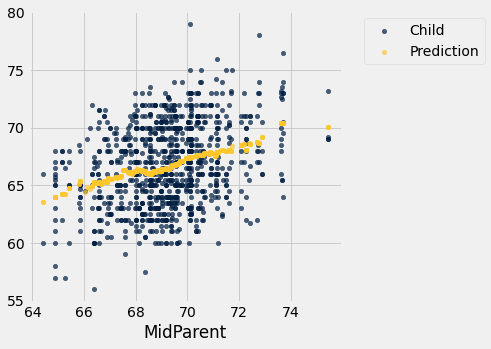

In [ ]:
heights_with_predictions.scatter('MidParent')

+ gold point들이 직선에 가깝다.
 - 그러한 선을 regression line이라 한다.
 - 나중에 Pearson이 연구한 correlation 개념이다.
 
+ Galton의 방법은 일종의 nearest neighbor방법이다.
 - 오늘날 대표적인 기계학습/인공지능 방법 중 하나이다.

> ### Classifying by One Variable
---
+ Individual을 어떤 variable 값에 따라 분류를 할 수 있다.
 - 이미 배운 Table의 group() method를 활용
 - 각 group의 count값이 조사된다.
 
 
+ 그렇게 분류된 group의 다른 feature들을 계산할 수 있다.
 - group() method에 function을 인자로 전달

In [ ]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [ ]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


+ 기본적인 group() method는 count를 계산한다.


+ function을 argument로 전달하여 다른 feature를 구해보자.
 -  Flavor 그룹에서 가격합, 최대가격, 평균가격을 각각 구해보자.

In [ ]:
cones.group('Flavor', sum)


Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [ ]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,6.55
strawberry,5.25


In [ ]:
cones.group('Flavor', np.mean)

Flavor,Price mean
chocolate,5.51667
strawberry,4.4


> ### Example: NBA Salaries
---


In [ ]:
nba = Table.read_table(fpath+'nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY')
nba


PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


#### 1. How much money did each team pay for its players’ salaries?

In [ ]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


#### 2. How many NBA players were there in each of the five positions?

In [ ]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


#### 3. What was the average salary of the players at each of the five positions?

In [ ]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


+ 미리 Table column을 잘 정의해 두는 게 좋다.

In [ ]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


> ### Cross-Classifying by More than One Variable
---
+ Individual을 두 개 이상의 variable 값에 따라 분류를 할 수 있다.
 - group() method
 
+ 다음 예를 살펴 보자.

In [ ]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


- 앞서 배운 single variable 값에 의한 grouping을 복습하면,

In [ ]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


- 두 변수 값 쌍에 의해 grouping 해 보자.

In [ ]:
more_cones.group(['Flavor', 'Color'])

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


+ 주의할 점은 variable들을 첫 번째 argument에 리스트([ ])로 정의해야 한다.


+ 앞에서 배운 group 특성 계산을 응용해 볼 수 있다.


In [ ]:
more_cones.group(['Flavor', 'Color'], sum)


/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [ ]:
more_cones.group(['Flavor', 'Color'], np.mean)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Flavor,Color,Price mean
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


+ 분류 변수들을 2개보다 많이 사용할 수 있다.


+ 그러나 너무 많아지면 경우의 수가 기하급수적으로 증가하여 직관적 이해가 어려울 수 있다.

> ### Pivot Tables
---
+ 분류 변수가 2개인 경우 더 보기 좋게 출력하는 table 


+ Contingency table 이라고도 한다.


+ Table의 pivot() method 를 사용한다.
 - 다음과 같이 실행해 보자.

In [ ]:
more_cones.pivot('Flavor', 'Color')
# default 값이 count임.

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


- group() 에서 특성을 계산했듯이 pivot()에서도 가능한다.

In [ ]:
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


> ### Example: Education and Income of Californian Adults
---
+ 학력과 수입사이에 관련성을 조사해 보자.
 - 2008년부터 2014년 캘리포니아 주민 성인 데이터 파일

In [ ]:
full_table = Table.read_table(fpath+'educ_inc.csv')
full_table

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
1/1/08 0:00,00 to 17,Male,No high school diploma,"F: 35,000 to 49,999",2227
1/1/08 0:00,00 to 17,Male,No high school diploma,"E: 25,000 to 34,999",2606
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",3465
1/1/08 0:00,00 to 17,Male,No high school diploma,"D: 15,000 to 24,999",3974
1/1/08 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",4233


+ 각 column의 값의 distribution은 다음과 같다.

|Column|Description|
---|---
|Year|2008년부터 2014년|
|Age|3그룹의 연령대|
|Gender|2그룹의 성별|
|Educational Attainment|4그룹의 학력|
|Personal Income|8그룹의 수입|



In [ ]:
full_table.group('Year')

Year,count
1/1/08 0:00,145
1/1/09 0:00,149
1/1/10 0:00,147
1/1/11 0:00,151
1/1/12 0:00,145
1/1/13 0:00,144
1/1/14 0:00,145


In [ ]:
full_table.group('Age')

Age,count
00 to 17,134
18 to 64,448
65 to 80+,444


In [ ]:
full_table.group('Gender')

Gender,count
Female,513
Male,513


In [ ]:
full_table.group(3)

Educational Attainment,count
Bachelor's degree or higher,231
"College, less than 4-yr degree",258
High school or equivalent,250
No high school diploma,287


In [ ]:
full_table.group(4)

Personal Income,count
"A: 0 to 4,999",143
"B: 5,000 to 9,999",141
"C: 10,000 to 14,999",138
"D: 15,000 to 24,999",137
"E: 25,000 to 34,999",122
"F: 35,000 to 49,999",118
"G: 50,000 to 74,999",115
"H: 75,000 and over",112


+ 전체 데이터 중 2014년 성인 그룹에 대해서만 분석하자.

In [ ]:
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


+ 필요한 column들만 추려 Table을 만들자.

In [ ]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


+ 먼저, 학력에 관한 분포를 살펴보자.

In [ ]:
education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


+ 편의를 위해 인구수를 백분율로 표시하자.

In [ ]:
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


+ 다음으로 학력과 수입 두 변수로 교차분류(cross-classified)한 pivot table을 만들어 보자.

In [ ]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


+ 어떤 특성이 있는가?


+ 보다 쉽게 알 수 있도록 백분율로 표시해보자.

In [ ]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


+ 대학졸업자와 미고졸자를 bar graph로 비교해보자.

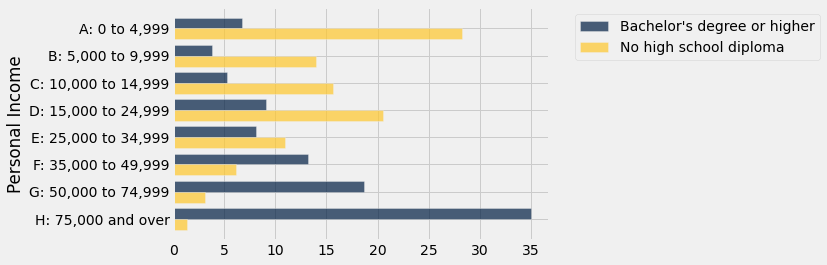

In [ ]:
distributions.select(0, 1, 4).barh(0)

> ### Joining Tables by Columns 
---
+ Data가 여러 Table에 흩어져 있을 경우 하나로 모을 필요가 있다.


+ 이를 Table join(결합)이라고 부른다.


+ 본 class에서는 Table의 join() method를 활용한다.


+ 다음 예를 살펴보자.

In [ ]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [ ]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings


Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


+ cones Table의 Flavor와 ratings Table의 Kind 속성의 의미가 동일하다.


+ 이 두 Table을 join해서 하나의 Table을 생성하자.

In [ ]:
rated = cones.join('Flavor', ratings, 'Kind')
rated

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


+ 이 예제에서처럼 join의 일반적인 호출 형태는 다음과 같다.


table1.join(table1_column_for_joining, table2, table2_column_for_joining)


In [ ]:
rated.with_column('$/Star', rated.column('Price') / rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


+ join하는 순서를 바꾸면 어떻게 될까?

In [ ]:
ratings.join('Kind', cones, 'Flavor')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


+ row와 column의 순서에는 차이가 있을 수 있으나 본질적인 차이는 없다.


+ 그리고 join 중 값이 빠진 경우는 어떻게 되는지 살펴보자.

In [ ]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [ ]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


In [ ]:
cones.join('Flavor', average_review, 'Flavor')

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


+ cones Table에 포함되었던 strawberry는 사라졌음에 주의하자.

> ### Example: Bike Sharing in the Bay Area 
---
+ 다음 매우 큰 dataset을 통해 Table 사용법을 연습해 보자.


+ 2014년 9월부터 2015년 8월까지 Bay area Bike sharing 
 - 총 354,152 대여건에 대한 정보
 - Columns: 
 
   * An ID for the rental 
   * Duration of the rental, in seconds 
   * Start date
   * Name of the Start Station and code for Start Terminal
   * Name of the End Station and code for End Terminal
   * A serial number for the bike
   * Subscriber type and zip code


In [ ]:
trips = Table.read_table(fpath+'trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


+ 그 중 free trip (1800초 미만)만 분석하자.


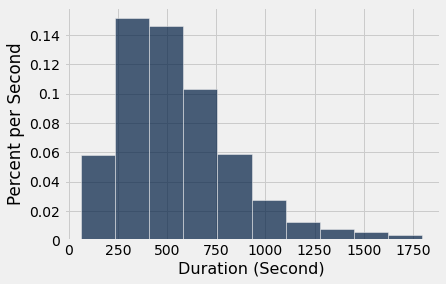

In [ ]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit='Second')

+ Bin을 조금 더 잘게 나누어 볼 수 있다.

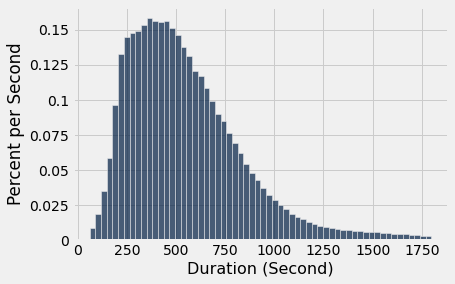

In [ ]:
commute.hist('Duration', bins=60, unit='Second')

+ 가장 빈도수가 높은 출발점을 조사해 보자.

In [ ]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


+ 출발지, 도착지 쌍에 대해서 grouping해 보자.

In [ ]:
commute.group(['Start Station', 'End Station'])

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Start Station,End Station,count
2nd at Folsom,2nd at Folsom,54
2nd at Folsom,2nd at South Park,295
2nd at Folsom,2nd at Townsend,437
2nd at Folsom,5th at Howard,113
2nd at Folsom,Beale at Market,127
2nd at Folsom,Broadway St at Battery St,67
2nd at Folsom,Civic Center BART (7th at Market),47
2nd at Folsom,Clay at Battery,240
2nd at Folsom,Commercial at Montgomery,128
2nd at Folsom,Davis at Jackson,28


+ 같은 내용을 pivot을 통해 살펴보자.

In [ ]:
commute.pivot('Start Station', 'End Station')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


+ 위 결과에 대해 각 구간 중 최소소요시간을 조사해 보자.

In [ ]:
commute.pivot('Start Station', 'End Station', 'Duration', min)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,483,329,306,0,494,239,262,687,599,0,0,639,416,282,80,0,0,506,237,167,250,0,0,0,0,0,0,208,264,290,0,0,0,0,0,0,0,0,0,300,303,584,0,0,0,0,0,0,0,0,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,290,188,171,0,357,104,81,490,341,0,0,369,278,122,60,0,0,416,142,61,68,0,0,0,0,0,0,60,237,106,0,0,0,0,0,0,0,0,0,63,66,458,0,0,0,0,0,0,0,0,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,546,520,474,0,436,145,232,509,494,0,0,773,549,325,221,0,0,667,367,265,395,0,0,0,0,0,0,319,455,398,0,0,0,0,0,0,0,0,0,125,133,742,0,0,0,0,0,0,0,0,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,179,412,364,0,543,419,359,695,609,0,0,235,474,453,145,0,0,269,161,250,306,0,0,0,0,0,0,234,89,202,0,0,0,0,0,0,0,0,0,256,221,347,0,0,0,0,0,0,0,0,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
Beale at Market,219,343,417,387,0,0,60,155,0,0,343,122,153,0,115,216,170,303,198,0,0,437,235,149,204,0,0,535,203,88,72,0,0,0,0,0,0,191,316,191,0,0,0,0,0,0,0,0,0,499,395,526,0,0,0,0,0,0,0,0,575,173,0,0,87,94,619,0,222,264
Broadway St at Battery St,351,424,499,555,0,0,195,62,0,0,520,90,129,0,70,340,284,128,101,0,0,961,148,168,357,0,0,652,351,218,221,0,0,0,0,0,0,255,376,316,0,0,0,0,0,0,0,0,0,611,599,799,0,0,0,0,0,0,0,0,738,336,0,0,169,291,885,0,134,411
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1771,0,484,131,0,0,0,0,0,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,0,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Drawing Maps
---
+ 지도상에 결과를 표현해 보자.
 - [OpenStreeMap](https://www.openstreetmap.org/)과 
 - [Folium](https://github.com/python-visualization/folium)을 이용

+ 이를 위해 추가로 각 station의 위경도, 랜드마크 정보 데이터를 활용하자.
 

In [ ]:
stations = Table.read_table(fpath+'station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [ ]:
Marker.map_table(stations.select('lat', 'long', 'name'))

+ SF city 지역에 대해 Circle을 사용해 표시해 보자.

In [ ]:
sf = stations.where('landmark', are.equal_to('San Francisco'))
sf_map_data = sf.select('lat', 'long', 'name')
Circle.map_table(sf_map_data, color='green', radius=10)

/usr/local/lib/python3.7/dist-packages/datascience/maps.py:797: FutureWarning: The 'radius' argument is deprecated. Please use 'area' instead.
  warnings.warn("The 'radius' argument is deprecated. Please use 'area' instead.", FutureWarning)


+ 도시별로 다른 색상으로 표시해보자.

In [ ]:
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [ ]:
colors = cities.with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [ ]:
joined = stations.join('landmark', colors, 'city')
colored = joined.select('lat', 'long', 'name', 'color')
Marker.map_table(colored)

In [ ]:
#just test
t = Table().with_columns([
        'lat', [37.8, 38, 37.9],
        'lon', [-122, -122.1, -121.9],
        'label', ['one', 'two', 'three'],
        'color', ['red', 'green', 'blue'],
        'radius', [3.0, 4.1, 50.1],
    ])
Circle.map_table(t)

/usr/local/lib/python3.7/dist-packages/datascience/maps.py:797: FutureWarning: The 'radius' argument is deprecated. Please use 'area' instead.
  warnings.warn("The 'radius' argument is deprecated. Please use 'area' instead.", FutureWarning)


+ 어떤 station이 출발지로서 자주 이용되는지 표시해보자.


+ 앞서 starts Table을 다시 사용하자.

In [ ]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [ ]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


In [ ]:
starts_map_data = station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
#    'area', station_starts.column('count') * 1000
    'radius', station_starts.column('count') * 0.002
)
starts_map_data.show(3)
Circle.map_table(starts_map_data)

lat,long,name,color,radius
37.7853,-122.396,2nd at Folsom,blue,15.682
37.7823,-122.393,2nd at South Park,blue,18.548
37.7805,-122.39,2nd at Townsend,blue,27.348


/usr/local/lib/python3.7/dist-packages/datascience/maps.py:797: FutureWarning: The 'radius' argument is deprecated. Please use 'area' instead.
  warnings.warn("The 'radius' argument is deprecated. Please use 'area' instead.", FutureWarning)


+ Circle의 크기 = 출발지빈도 * 1000


+ SF 지역에 큰 원들이 몰려 있다.

> ### Recap
---

+ Function 정의
 - 반복적으로 사용될 코드를 function으로 정의한다.
 - signature, docstring, body를 구현한다.


+ Function을 Table column에 적용하기
 - apply() method


+ Group의 특징(characteristic) 계산
 - Grouping 할 때 function을 argument로 전달하기
 - group(variable, <font color="red">___function___</font>)


+ 둘 이상의 변수들 값에 따라 분류하기
 - group의 첫 번째 argument에 variable list를 전달
 - 분류 변수가 2개인 경우 pivot() method로 pivot table 생성
 
+ 두 Table의 내용 결합하기
 - join() method
